<a href="https://colab.research.google.com/github/HMy2912/YOLO-heineken/blob/master/Copy_of_spatial_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Spatial understanding with Gemini 2.0

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fuse-cases%2Fspatial-understanding%2Fspatial_understanding.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/spatial-understanding/spatial_understanding.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| Authors |
| --- |
| [Guillaume Vernade](https://github.com/Giom-V) |
| [Holt Skinner](https://github.com/holtskinner) |

## Overview

This notebook introduces object detection and spatial understanding with the Gemini API in Vertex AI.


**YouTube Video: Building with Gemini 2.0: Spatial understanding**

<a href="https://www.youtube.com/watch?v=-XmoDzDMqj4" target="_blank">
  <img src="https://img.youtube.com/vi/-XmoDzDMqj4/maxresdefault.jpg" alt="Building with Gemini 2.0: Spatial understanding" width="500">
</a>


You'll learn how to use Gemini to perform object detection like this:

<img src="https://storage.googleapis.com/generativeai-downloads/images/cupcakes_with_bbox.png" alt="Cupcakes with Bounding box" width="500">

There are many examples, including object detection with

* simply overlaying information
* searching within an image
* translating and understanding things in multiple languages
* using Gemini thinking abilities

**Note**

There's no "magical prompt". Feel free to experiment with different ones. You can use the dropdown to see different samples, but you can also write your own prompts. Also, you can try uploading your own images.


## Get started

### Install Google Gen AI SDK


In [2]:
%pip install --upgrade --quiet google-genai pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.4/206.4 kB 8.6 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [4]:
import os

PROJECT_ID = "lookerstudio-seminar"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = "global"

In [5]:
from google import genai

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Import libraries

In [6]:
from IPython.display import display
from PIL import Image, ImageColor, ImageDraw, ImageFont
from google.genai.types import GenerateContentConfig, Part, SafetySetting
from pydantic import BaseModel
import requests

### Load model

Spatial understanding works best with the [Gemini 2.5 Flash model](https://cloud.google.com/vertex-ai/generative-ai/docs/gemini-v2).

For more information about all AI models and APIs on Vertex AI, see [Google Models](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models) and [Model Garden](https://cloud.google.com/vertex-ai/generative-ai/docs/model-garden/explore-models).

In [7]:
MODEL_ID = "gemini-2.5-flash"  # @param {type:"string", isTemplate: true}

We'll set the configuration to include a system instruction, safety settings, and a Pydantic class for Controlled Generation.

The system instructions are mainly used to make the prompts shorter by not having to repeat the format each time. They are also telling the model how to deal with similar objects which is a nice way to let it be creative.


In [8]:
class BoundingBox(BaseModel):
    """
    Represents a bounding box with its 2D coordinates and associated label.

    Attributes:
        box_2d (list[int]): A list of integers representing the 2D coordinates of the bounding box,
                            typically in the format [y_min, x_min, y_max, x_max].
        label (str): A string representing the label or class associated with the object within the bounding box.
    """

    box_2d: list[int]
    label: str


config = GenerateContentConfig(
    system_instruction="""eturn bounding boxes as an array with labels. Never return masks. Limit to 25 objects.
    If an object is present multiple times, give each object a unique label according to its distinct characteristics (colors, size, position, etc.).

    Detect only the following class of object:
    Beer crates: Stacks of beer crates. If the brand is visible, label it with the brand name (e.g., 'Heineken Beer crate', 'Tiger Beer crate', 'Larue Beer crate', 'Biaviet Beer crate', 'Bivina Beer crate', 'Strongbow Beer crate', 'Edelweiss Beer crate'). If the brand is not visible, label it as 'Unknown Beer crate'.""",
    temperature=0.5,
    safety_settings=[
        SafetySetting(
            category="HARM_CATEGORY_DANGEROUS_CONTENT",
            threshold="BLOCK_ONLY_HIGH",
        ),
    ],
    response_mime_type="application/json",
    response_schema=list[BoundingBox],
)

### Helper functions

Create methods to draw the bounding boxes onto images.

In [9]:
def plot_bounding_boxes(image_path: str, bounding_boxes: list[BoundingBox]) -> None:
    """
    Plots bounding boxes on an image with labels, using PIL and normalized coordinates.

    Args:
        image_uri: The URI of the image file.
        bounding_boxes: A list of BoundingBox objects. Each box's coordinates are in
                        normalized [y_min, x_min, y_max, x_max] format.
    """
    with Image.open(image_path) as im:
        width, height = im.size
        draw = ImageDraw.Draw(im)
        colors = list(ImageColor.colormap.keys())

        # Load a font
        font = ImageFont.load_default(size=int(min(width, height) / 50))

        for i, bbox in enumerate(bounding_boxes):
            # Scale normalized coordinates to image dimensions
            abs_y_min = int(bbox.box_2d[0] / 1000 * height)
            abs_x_min = int(bbox.box_2d[1] / 1000 * width)
            abs_y_max = int(bbox.box_2d[2] / 1000 * height)
            abs_x_max = int(bbox.box_2d[3] / 1000 * width)

            color = colors[i % len(colors)]

            # Draw the rectangle using the correct (x, y) pairs
            draw.rectangle(
                ((abs_x_min, abs_y_min), (abs_x_max, abs_y_max)),
                outline=color,
                width=4,
            )
            if bbox.label:
                # Position the text at the top-left corner of the box
                draw.text(
                    (abs_x_min + 8, abs_y_min + 6),
                    bbox.label,
                    fill=color,
                    font=font,
                )

        display(im)

### Overlaying Information

Let's start by loading an image of cupcakes.

<img src="https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg" alt="Cupcakes" width="500">

Let's start with a simple prompt to find all items in the image.

In [13]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Specify your image path in Google Drive
image_path = "/content/drive/MyDrive/2025/2025/HK3/HTK/Final/training/img/full/image_111.jpg"  # Replace with your actual image path

In [15]:
# Define the prompt for your HEINEKEN project
prompt = """Detect all beer crates and their brands."""

# Generate content with Gemini
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        Part.from_bytes(
            data=open(image_path, "rb").read(),
            mime_type="image/jpeg",
        ),
    ],
    config=config,
)

# Print the response
print(response.text)

[
  {
    "box_2d": [154, 442, 240, 608],
    "label": "Tiger Beer crate"
  },
  {
    "box_2d": [238, 442, 323, 607],
    "label": "Heineken Beer crate"
  },
  {
    "box_2d": [322, 441, 410, 608],
    "label": "Larue Beer crate"
  },
  {
    "box_2d": [408, 441, 497, 608],
    "label": "Larue Beer crate"
  },
  {
    "box_2d": [237, 642, 322, 808],
    "label": "Larue Beer crate"
  },
  {
    "box_2d": [321, 642, 408, 809],
    "label": "Larue Beer crate"
  },
  {
    "box_2d": [407, 642, 495, 809],
    "label": "Larue Beer crate"
  },
  {
    "box_2d": [492, 441, 580, 608],
    "label": "Tiger Beer crate"
  },
  {
    "box_2d": [578, 441, 666, 608],
    "label": "Tiger Beer crate"
  },
  {
    "box_2d": [664, 441, 752, 608],
    "label": "Tiger Beer crate"
  },
  {
    "box_2d": [750, 441, 838, 608],
    "label": "Tiger Beer crate"
  },
  {
    "box_2d": [836, 441, 924, 608],
    "label": "Tiger Beer crate"
  },
  {
    "box_2d": [492, 642, 580, 809],
    "label": "Tiger Beer crate"

Next, we'll plot the bounding boxes on the image.

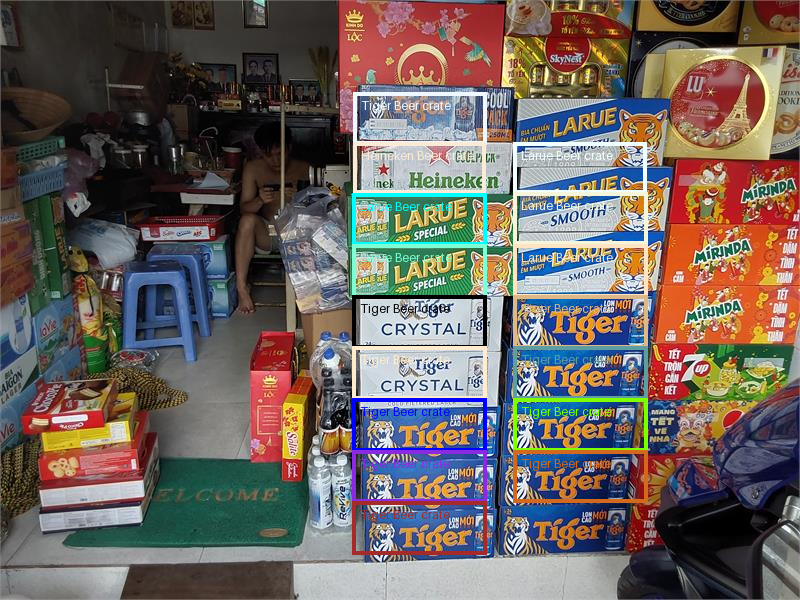

In [16]:
plot_bounding_boxes(image_path, response.parsed)

In [ ]:
raise Exception("Stop here")

We can see that Gemini created bounding boxes with labels for the different cupcakes.

### Search within an image

Let's complicate things and search within another image for specific objects.

In [ ]:
image_uri = "https://storage.googleapis.com/generativeai-downloads/images/socks.jpg"
prompt = "Show me the positions of the socks with a face. Label according to position in the image."  # @param ["Detect all rainbow socks", "Find all socks and label them with emojis ", "Show me the positions of the socks with a face. Label according to position in the image.", "Find the sock that goes with the one at the top"] {"allow-input":true}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        Part.from_uri(
            file_uri=image_uri,
            mime_type="image/jpeg",
        ),
    ],
    config=config,
)

print(response.text)

In [ ]:
plot_bounding_boxes(image_uri, response.parsed)

### Use Gemini reasoning capabilities

The model can also reason based on the image. You can ask it about the positions of items, their utility, or, like in this example, to find the shadow of a specific item.

In [ ]:
image_uri = "https://storage.googleapis.com/generativeai-downloads/images/origamis.jpg"
prompt = "Draw a square around the fox shadow"  # @param ["Find the two origami animals.", "Where are the origamis' shadows?", "Draw a square around the fox shadow"] {"allow-input":true}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        Part.from_uri(
            file_uri=image_uri,
            mime_type="image/jpeg",
        ),
    ],
    config=config,
)

print(response.text)

In [ ]:
plot_bounding_boxes(image_uri, response.parsed)

You can also use Gemini knowledge to enhance the labels returned. In this example Gemini, will give you advice on how to fix your little mistake.

As you can see this time, you're only resizing the image to 1024px as it helps the model getting the bigger picture and give you advice. There's no clear rule about when to do it, experiment and find what works the best for you.

In [ ]:
image_uri = "https://storage.googleapis.com/generativeai-downloads/images/spill.jpg"
prompt = "Tell me how to clean my table with an explanation as label"  # @param ["Show me where my coffee was spilled.", "Tell me how to clean my table with an explanation as label"] {"allow-input":true}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        Part.from_uri(
            file_uri=image_uri,
            mime_type="image/jpeg",
        ),
    ],
    config=config,
)

print(response.text)

In [ ]:
plot_bounding_boxes(image_uri, response.parsed)

### Try with more images

Here are some more sample images to try prompting with Gemini.

- https://storage.googleapis.com/generativeai-downloads/images/vegetables.jpg
- https://storage.googleapis.com/generativeai-downloads/images/Japanese_Bento.png
- https://storage.googleapis.com/generativeai-downloads/images/fruits.jpg
- https://storage.googleapis.com/generativeai-downloads/images/cat.jpg
- https://storage.googleapis.com/generativeai-downloads/images/pumpkins.jpg
- https://storage.googleapis.com/generativeai-downloads/images/breakfast.jpg
- https://storage.googleapis.com/generativeai-downloads/images/bookshelf.jpg